# Mush Room Classification

## Kaggle 필사 및 참고
- https://www.kaggle.com/prashant111/comprehensive-guide-on-feature-selection

## 1. 특징 추출 개요

### 특징 추출에 대한 이해
- 특징을 추출한다는 것은 거대한 크기의 데이터에서 적절한 수치 데이터를 선택하는 과정이다. 
- Feature Selection or Variable Selection 은 머신러닝 알고리즘을 빌드하는 과정에서 관련 특징 및 변수를 선택하는 것이다.

### 특징 추출의 장점
1. 정확성 향상
2. 해석하기 쉬운 간단한 모델
3. 더 짧은 훈련 시간
4. Overfitting을 줄이면서 일반화를 향상
5. 소프트웨어 개발자가 적용하기 쉬움
6. 모델 사용에 따르는 오류 위험을 줄일 수 있음
7. 변수 중복
8. 높은 차원 공간에서의 안좋은 학습 경험

### 특징 추출 기술
1. Filter methods
2. Wrapper methods
3. Embedded methods

### 필터 방법
1. Basic Methods
2. Univariate methods
3. Information gain
4. Fischer score
5. Correlation Matrix with Heatmap

### Wrapper Methods
1. Forward Selection
2. Backward Elimination
3. Exhaustive Feature Selection
4. Recursive Feature Elimination
5. Recursive Feature Elimination with Cross-Validation

### Embedded Methods
1. LASSO
2. RIDGE
3. Tree Importance

## 2. Filter Methods (필터 방법)
- 필터 방법은 전처리 과정엣 일반적인  과정으로 특징을 추출하는 것은 머신러닝 알고리즘과 독립된 과정이다. 대신에, 특징이 결과 변수에 따라오는 다양한 통계 테스트 점수에 의해 선택된다. 
    - 데이터 특징에 따라 방법이 결정된다.
    - 머신러닝 알고리즘을 사용하지 않는다.
    - 모델을 확실히 알고 있지 않는다.
    - 수치적으로 덜 비싼 과정인 경향이 보인다.
    - Wrapper method 보다 더 낮은 예측 성능을 보인다.
    - 관련없는 특징을 제거하고 빠르게 적합시키는데 좋다. 


- 필터 방법은 아래와 같은 다양한 기술들을 가지고 있다.
    - 2.1 Basic Methods
    - 2.2 Univariate feature selection
    - 2.3 Information gain
    - 2.4 Fischer score
    - 2.5 ANOVA F-Value for Feature Selection
    - 2.6 Correlation Matrix with Heatmap

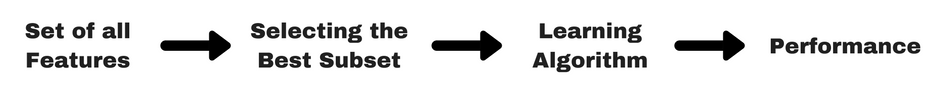

In [3]:
from IPython.display import display, Image
display(Image(filename="Feature-Selection.png"))

## 2.1 Basic Methods
- 기본 방법은 quasi-constant 특징을 제거하는 것

### 2.1.1 상수 특징을 제거하기
- Constant features는 데이터 셋을 관찰하면서 오로지 같은 값만 보이는 것을 말한다. 즉, 데이터셋의 row 에 같은 값이 있고 이러한 특징은 머신러닝 모델을 사용하면서 어떠한 정보도 주지 않는다.
- 상수 특징을 확인하고 제거하는 것은 기본적으로 특징 추출하는 첫 과정이자 머신러닝 모델 이해가 쉬워지게 하는 것이다. 이러한 특징을 확인하기 위해 "VarianaceThreshold" 함수를 사용할 수 있다.
- Santander Customer Satisfaction dataset from kaggle 을 사용해 상수 특징이 무엇인지 감을 잡을 수 있다. 
- https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.VarianceThreshold.html
- https://scikit-learn.org/stable/modules/feature_selection.html

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [5]:
X_train = pd.read_csv('./Santander-Customer-Satisfaction/train.csv',
                     nrows=35000)
X_test = pd.read_csv('./Santander-Customer-Satisfaction/test.csv',
                    nrows=15000)

In [6]:
X_train.drop(labels=['TARGET'], axis=1, inplace=True)

In [7]:
X_train.shape, X_test.shape

((35000, 370), (15000, 370))

#### 명심할 사항!!
- 모든 특징 추출과정에서, 트레인 셋에서 좋은 특징을 뽑는 것이 중요하다.

#### sklearn에서 variance threshold 사용하기
- Variance threshold(분류 기준)는 특징 추출을 위해 가장 기본적인 접근 방법이다. 이 기준은 몇몇 기준에 충족하지 않는 편향들을 제거하고 기본적으로 모든 0 값이 특징이나 모든 샘플에서 같은 값을 가지는 특징도 제거해준다. 

In [8]:
from sklearn.feature_selection import VarianceThreshold
sel = VarianceThreshold(threshold=0)

# fit은 0 값을 가지는 특징을 찾아준다. 
sel.fit(X_train)

VarianceThreshold(threshold=0)

In [9]:
# get_support는 어떤 특징들이 재훈련되었는지 True or False vector를 말한다.
# 만약에 우리가 get_support를 합하면, 상수가 아닌 특징들의 수를 얻을 수 있다.
sum(sel.get_support())

319

In [10]:
# 상수가 아닌 특징을 찾는 다른 방법
len(X_train.columns[sel.get_support()])

319

In [11]:
# 상수 특징 찾기
print(
    len([
        x for x in X_train.columns
        if x not in X_train.columns[sel.get_support()]
    ])
)
[x for x in X_train.columns if x not in X_train.columns[sel.get_support()]]

51


['ind_var2_0',
 'ind_var2',
 'ind_var18_0',
 'ind_var18',
 'ind_var27_0',
 'ind_var28_0',
 'ind_var28',
 'ind_var27',
 'ind_var34_0',
 'ind_var34',
 'ind_var41',
 'ind_var46_0',
 'ind_var46',
 'num_var18_0',
 'num_var18',
 'num_var27_0',
 'num_var28_0',
 'num_var28',
 'num_var27',
 'num_var34_0',
 'num_var34',
 'num_var41',
 'num_var46_0',
 'num_var46',
 'saldo_var18',
 'saldo_var28',
 'saldo_var27',
 'saldo_var34',
 'saldo_var41',
 'saldo_var46',
 'delta_imp_amort_var18_1y3',
 'delta_imp_amort_var34_1y3',
 'imp_amort_var18_hace3',
 'imp_amort_var18_ult1',
 'imp_amort_var34_hace3',
 'imp_amort_var34_ult1',
 'imp_reemb_var13_hace3',
 'imp_reemb_var17_hace3',
 'imp_reemb_var33_hace3',
 'imp_trasp_var17_out_hace3',
 'imp_trasp_var33_out_hace3',
 'num_var2_0_ult1',
 'num_var2_ult1',
 'num_reemb_var13_hace3',
 'num_reemb_var17_hace3',
 'num_reemb_var33_hace3',
 'num_trasp_var17_out_hace3',
 'num_trasp_var33_out_hace3',
 'saldo_var2_ult1',
 'saldo_medio_var13_medio_hace3',
 'saldo_medio_var2

- 위에서 볼 수 있듯이 51개의 columns 및 변수가 상수임을 알 수 있다. 이것은 51개의 변수가 같은 값, 즉 하나의 값만 모든 훈련 세트에서 가지고 있다는 것을 의미한ㄴ다.
- 우리는 훈련 및 테스트 세트를 줄이는 변형 함수를 쓰면 된다.

In [12]:
# train 과 test 세트에서 columns 들을 줄이자
X_train = sel.transform(X_train)
X_test =sel.transform(X_test)

In [13]:
# training 과 test 세트의 모양을 확인해보자
X_train.shape, X_test.shape

((35000, 319), (15000, 319))

- 이를 통해 우리가 상수 특징을 어떻게 제거하거나 차원을 줄이는지 알 수 있었다.

### 2.1.2 Quasi-constant 특징들 제거하기
- 쿼시 상수(Quasi-constant) 특징들은 데이터셋 관찰과정에서 대다수가 같은 값을 보이는 것이다. 일반적으로, 이러한 특징들은 만약 우리의 타겟을 예측하고 구분하는 머신러닝 모델 정보에 어느 정도 제공을 한다. 하지만 예외는 있다. 그래서 우리는 이러한 타입의 특징들을 제거하는데 조심해야 한다. Quasi-constant 특징들을 제거하고 확인하는 과정은 특징 추출의 첫 과정이고 머신러닝 모델 이해하는데 중요한 발판이다. 
- 쿼시 상수를 확인하기 위해서 우리는 다시 VarianceThreshold 함수를 사용할 것이다.

In [15]:
X_train = pd.read_csv('./Santander-Customer-Satisfaction/train.csv',
                     nrows=35000)
X_test = pd.read_csv('./Santander-Customer-Satisfaction/test.csv',
                    nrows=15000)
X_train.drop(labels=['TARGET'], axis=1, inplace = True)
X_train.shape, X_test.shape

((35000, 370), (15000, 370))

#### Variance threshold 사용하기
- 여기서 우리는 쿼시 상수 특징을 바꿀 것이다.

In [17]:
# 0.1은 대략적으로 관찰값의 99%를 의미함
sel = VarianceThreshold(threshold=0.01)
sel.fit(X_train)

VarianceThreshold(threshold=0.01)

In [18]:
sum(sel.get_support())

263

In [19]:
len(X_train.columns[sel.get_support()])

263

In [20]:
print(
    len([
        x for x in X_train.columns
        if x not in X_train.columns[sel.get_support()]
    ])
)

[x for x in X_train.columns if x not in X_train.columns[sel.get_support()]]

107


['ind_var1',
 'ind_var2_0',
 'ind_var2',
 'ind_var6_0',
 'ind_var6',
 'ind_var13_largo',
 'ind_var13_medio_0',
 'ind_var13_medio',
 'ind_var14',
 'ind_var17_0',
 'ind_var17',
 'ind_var18_0',
 'ind_var18',
 'ind_var19',
 'ind_var20_0',
 'ind_var20',
 'ind_var27_0',
 'ind_var28_0',
 'ind_var28',
 'ind_var27',
 'ind_var29_0',
 'ind_var29',
 'ind_var30_0',
 'ind_var31_0',
 'ind_var31',
 'ind_var32_cte',
 'ind_var32_0',
 'ind_var32',
 'ind_var33_0',
 'ind_var33',
 'ind_var34_0',
 'ind_var34',
 'ind_var40',
 'ind_var41',
 'ind_var39',
 'ind_var44_0',
 'ind_var44',
 'ind_var46_0',
 'ind_var46',
 'num_var6_0',
 'num_var6',
 'num_var13_medio_0',
 'num_var13_medio',
 'num_var18_0',
 'num_var18',
 'num_op_var40_hace3',
 'num_var27_0',
 'num_var28_0',
 'num_var28',
 'num_var27',
 'num_var29_0',
 'num_var29',
 'num_var33',
 'num_var34_0',
 'num_var34',
 'num_var41',
 'num_var46_0',
 'num_var46',
 'saldo_var18',
 'saldo_var28',
 'saldo_var27',
 'saldo_var34',
 'saldo_var41',
 'saldo_var46',
 'delta_

- 107개의 변수가 대부분 상수라는 것을 알 수 있다. 이 의미는 훈련 세트에서 99%가 하나의 값으로 도배되어있다는 것이다.

In [21]:
X_train['ind_var31'].value_counts() / np.float(len(X_train))

0    0.996286
1    0.003714
Name: ind_var31, dtype: float64

- 여기서 이 변수는 99% 이상이 0으로 이루어져 있다는 것을 알 수 있다.

In [22]:
# 쿼시 상수 특징들을 훈련 세트와 테스트 세트에서 제거할 수 있다.
X_train = sel.transform(X_train)
X_test = sel.transform(X_test)
X_train.shape, X_test.shape

((35000, 263), (15000, 263))

- 상수 및 쿼시 상수 특징들을 제거하고 우리는 370에서 263으로 특징 차원을 줄일 수 있었다. 

## 2.2 단변량 selection methods
- 단변량 특징 추출 방법은 ANOVA 같은 단변량 통계 테스트를 기반으로 최고의 특징들을 선택해 작동시키는 것을 말한다. 이는 측정 지표로서의 전처리 과정으로 보일 수 있지만 Scikit-learn은 특징 추출 선택 루틴이 변형 방법을 적용하는 방법으로서 적용된다.
- F-test 기반 방법은 2개의 랜덤 변수 사이에서 선형 의존성 정도를 측정하는 것이다. 특징과 목표 사이에서 선형관계를 추정하고 가우시안 분포를 따라하는 변수도 추정한다.
- 여기에 4개의 방식을 사용한다. 
    1. SelectKBest
    2. SelectPercentile
    3. SelectFpr, SelectFdr, or family wise error SelectFwe
    4. GenericUnivariateSelection
- 출처 : https://scikit-learn.org/stable/modules/feature_selection.html
- SelectKBest나 SelectPercentile에 대한 논의가 부족하지만 이 2개는 실행 과정에서 흔히 쓰이는 방법이다. 

### 2.2.1 SelectKBest
- 이 방식은 K 높은 점수에 따른 특징을 선택하는 것이다.
- 예를 들어, Chi-Square 테스트에서 오로지 2개의 최고 특징들만 반환하도록 하는 것이다. 
- 출처 : https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectKBest.html#sklearn.feature_selection.SelectKBest

In [24]:
from sklearn.datasets import load_iris
from sklearn.feature_selection import SelectKBest, chi2
X, y = load_iris(return_X_y=True)
X.shape

(150, 4)

In [25]:
X_new = SelectKBest(chi2, k=2).fit_transform(X, y)
X_new.shape

(150, 2)

### 2.2.2 SelectPercentile
- 높은 점수 비율에 따른 특징 추출
- 출처 : https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectPercentile.html#sklearn.feature_selection.SelectPercentile

In [26]:
from sklearn.datasets import load_digits
from sklearn.feature_selection import SelectPercentile, chi2
X, y = load_digits(return_X_y=True)
X.shape

(1797, 64)

In [27]:
X_new = SelectPercentile(chi2, percentile=10).fit_transform(X, y)
X_new.shape

(1797, 7)

### 중요한 정보
- SelectKBest, SelectPercentile은 단변량 값과 P-value를 반환하는 점수 함수이다.
- 회기 분석 과정 : f_regression, mutual_info_regression
- 분류 과정 : chi2, f_classif, mutual_info_classif

- 이 방법들은 2개의 랜덤 변수 사이에서 선형 의존성을 측정하는 F-test에 기반을 두고 있다. 반대로, 상호 정보 방법들은 통계적 의존성이라는 정보를 가지고 잇다. 그러나 변수를 선택하지 않는 다면 그들은 정확한 측정을 위한 샘플을 요구하고 있다. 

### 분산 데이터에서 특징 추출하기
- 만약 분산 데이터를 사용한다면 chi2, mutual_info_classif, mutual_info_regression가 데이터 밀집시키는 것 없이 데이터를 다룰 수 있다. 

### 조심해야 할 것
- 분류 문제에서 회기 점수 함수를 사용해도 쓸모없는 결과를 얻기에 사용하지 안하아야 한다.

## 2.3 Information Gain
- Informatin Gain or Mutual Information은 얼마나 많은 정보들이 정확한 목표 예측에 특징들이 기여하는지 Presence/Absence로 측정한다.
- Mutual Information이란 ? Mutual information measures the information that X and Y share: It measures how much knowing one of these variables reduces uncertainty about the other. For example, if X and Y are independent, then knowing X does not give any information about Y and vice versa, so their mutual information is zero. At the other extreme, if X is a deterministic function of Y and Y is a deterministic function of X then all information conveyed by X is shared with Y: knowing X determines the value of Y and vice versa. As a result, in this case the mutual information is the same as the uncertainty contained in Y (or X) alone, namely the entropy of Y (or X). Moreover, this mutual information is the same as the entropy of X and as the entropy of Y. (A very special case of this is when X and Y are the same random variable.)

### mutual_info_classif
- 분리된 목표 변수에 대한 상호 의존성 정보를 측정함
- 2개의 랜덤 변수 사이에서 Mutual Information(MI)은 음수가 아닌 값으로 변수간 의존성을 체크하고 오로지 2개의 변수가 독립적일 때 0을 반환한다. 만약 높은 값이면 높은 의존성을 의미한다.
- 이 함수는 KNN 거리에서 entropy 측정을 기반으로한 nonparametic 방법에 의존한다.
- 단변량 특징 추출에도 사용 가능하다.

### mutual_info_regression
- 연속적인 목표 변수에 대한 상호 의존성 정보를 측정함
- 이것도 음수가 아닌 값이고 mutual_info_classif와 같은 해석을 가진다.

## 2.4 Fisher Score (chi-suqare implementation)
- Scikit-learn에서 chi-square implementation으로 2개의 음수가 아닌 특징과 class 사이에서 chi-squared stats를 계산한다.
- 이 점수는 분류 작업에서 카테고리 변수를 평가하는데 사용해야 한다. 서로 다른 카테고리 특징 사이에서 Y를 다른 클래스로 분류하고 관찰하는데 비교한다.

In [28]:
from sklearn.datasets import load_iris
from sklearn.feature_selection import SelectKBest, chi2

In [30]:
iris = load_iris()

X = iris.data
y = iris.target

# 카테고리 데이터를 정수로 변환
X = x.astype(int)

In [31]:
# Chi-Square 통계치 비교
# 더 높은 수치인 2개의 특징을 선택
chi2_selector = SelectKBest(chi2, k=2)
X_kbest = chi2_selector.fit_transform(X, y)

In [32]:
print('기존 특징 개수: ', X.shape[1])
print('줄어든 특징 개수: ', X_kbest.shape[1])

기존 특징 개수:  4
줄어든 특징 개수:  2


## 2.5 ANOVA F-value For Feature Selection
- 제공된 샘플에서 ANOVA F-value를 계산하기
- 만약 특징이 카테고리라면 우리는 각 특징과 목표 벡터 사이에서 Chi-Square 통계치를 계산할 것이다. 그러나 만약 특징이 양적인 요소이면 ANOVA F-value를 계산할 것이다.
- F-value 점수에서 목표 벡터에 의한 수적인 특징을 그룹화했을 때 평균은 상당히 다를 것이다.

In [33]:
from sklearn.datasets import load_iris
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

In [34]:
iris = load_iris()

X = iris.data
y = iris.target

In [35]:
fvalue_selector = SelectKBest(f_classif, k=2)
X_kbest = fvalue_selector.fit_transform(X, y)

In [36]:
print('기본 특징 개수: ', X.shape[1])
print('줄어든 특징 개수: ', X_kbest.shape[1])

기본 특징 개수:  4
줄어든 특징 개수:  2


## 2.6 히트맵을 활용한 상관관계 행렬
- 상관관계는 2개 혹은 그 이상의 변수 사이에서의 선형 관계 측정지표이다. 이를 통해 우리는 다른 것으로 부터 하나의 변수를 예측할 수 있다. 
- 좋은 변수는 목표치와 매우 높은 상관관계를 가지고 있는 것이다.
- 연관된 예측 변수는 풍부한 정보를 제공해준다.
- 변수들은 목표와 관계가 있어야 하지만 서로는 관계 없어야 한다.
- 상관관계를 통한 특징 추출은 위와 같은 원칙을 기반으로 특징 평가하게 된다.

- 피어슨 상관계수를 이용하면 -1에서 1로 다양하게 분포될 것이다.
- 만약 2개 사이의 상관계수가 0이면 서로 그 어떤 영향도 주지 않을 것이다.
- 만약 0 이상이면 한 쪽 값이 커지면 다른 값도 커지게 된다. 따라서, 1에 가까울 수록 서로 강하게 엮여있다는 것을 의미한다.
- 만약 0 이하이면 한 쪽 값이 커지면 다른 값은 줄어들게 된다는 것으로 서로 역행하는 관계를 의미한다. 

In [37]:
from sklearn.datasets import load_iris
iris = load_iris()

X = iris.data
y = iris.target

In [38]:
df = pd.DataFrame(X)

print(df)

       0    1    2    3
0    5.1  3.5  1.4  0.2
1    4.9  3.0  1.4  0.2
2    4.7  3.2  1.3  0.2
3    4.6  3.1  1.5  0.2
4    5.0  3.6  1.4  0.2
..   ...  ...  ...  ...
145  6.7  3.0  5.2  2.3
146  6.3  2.5  5.0  1.9
147  6.5  3.0  5.2  2.0
148  6.2  3.4  5.4  2.3
149  5.9  3.0  5.1  1.8

[150 rows x 4 columns]


In [39]:
corr_matrix = df.corr()
print(corr_matrix)

          0         1         2         3
0  1.000000 -0.117570  0.871754  0.817941
1 -0.117570  1.000000 -0.428440 -0.366126
2  0.871754 -0.428440  1.000000  0.962865
3  0.817941 -0.366126  0.962865  1.000000


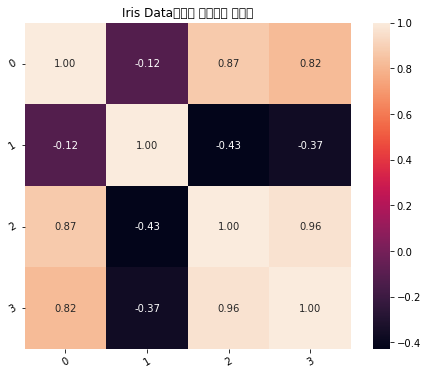

In [40]:
plt.figure(figsize=(8, 6))
plt.title('Iris Data에서의 상관계수 히트맵')
a = sns.heatmap(corr_matrix, square=True, annot=True, fmt='.2f', linecolor='black')
a.set_xticklabels(a.get_xticklabels(), rotation=30)
a.set_yticklabels(a.get_yticklabels(), rotation=30)
plt.show()

In [41]:
# 대각선을 기준으로 위쪽 삼각형을 선택한다
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
upper

,0,1,2,3
0,NaN,-0.11757,0.871754,0.817941
1,NaN,NaN,-0.428440,-0.366126
2,NaN,NaN,NaN,0.962865
3,NaN,NaN,NaN,NaN


In [42]:
to_drop = [column for column in upper.columns if any(upper[column] > 0.9)]
print(to_drop)

[3]


In [43]:
df1 = df.drop(df.columns[to_drop], axis=1)
print(df1)

       0    1    2
0    5.1  3.5  1.4
1    4.9  3.0  1.4
2    4.7  3.2  1.3
3    4.6  3.1  1.5
4    5.0  3.6  1.4
..   ...  ...  ...
145  6.7  3.0  5.2
146  6.3  2.5  5.0
147  6.5  3.0  5.2
148  6.2  3.4  5.4
149  5.9  3.0  5.1

[150 rows x 3 columns]


# 3. Wrapper Methods
- wrapper methods로 특징들의 하위 세트를 만들어 모델에 적용해 훈련할 수 있다. 이전 모델로 부터 가져온 추론을 기반으로 우리는 하위 세트를 추가할지 제거할지 결정할 수 있다. 이 문제는 특히는 조사 과정을 줄이는데 필수적이다. 
- Wrapper Methods를 사용하는 예는 아래와 같다.
    1. Forward Seleciton
    2. Backward Elimination
    3. Exhaustive Feature Selection
    4. Recursive Feature Elimination
    5. Recursive Feature Elimination with cross-validation
- 이를 그림으로 표현하면 아래와 같다.